In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('income_evaluation.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [4]:
cat_cols = [' workclass',' education',' marital-status',' occupation',' relationship',' race',' sex',' native-country',' income']

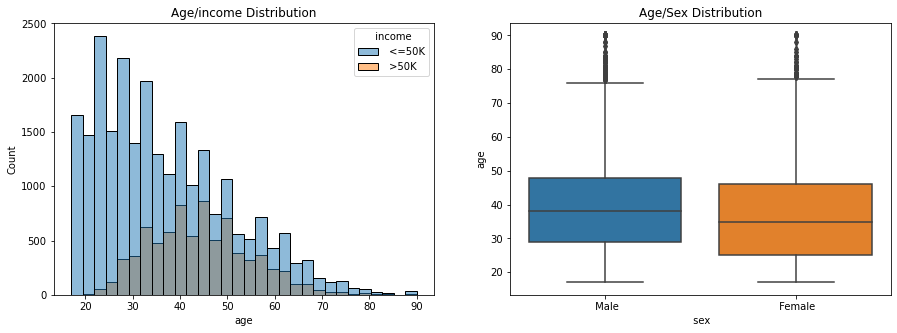

In [5]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(data, x='age', bins=30, hue=" income", ax=ax[0]).set_title("Age/income Distribution");
sns.boxplot(data=data, x=" sex", y="age", ax=ax[1]).set_title("Age/Sex Distribution");


In [6]:
for col in cat_cols:
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.codes
    

In [7]:
y=data[' income']
X = data.drop(' income',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


In [9]:
error_rate = []
param_grid = [
  {'n_neighbors': list(range(1, 30,5))}]
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=True,verbose=1)
grid_search=grid.fit(X_train, y_train)

# plt.figure(figsize=(10,6))
# plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
#          marker='o',markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')
# plt.show()
# print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


In [10]:
 grid_search.best_params_

{'n_neighbors': 21}

In [11]:
grid_search.best_score_


0.8001379982368775

In [14]:
y_pred= grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test,y_pred)

0.7930293259634577

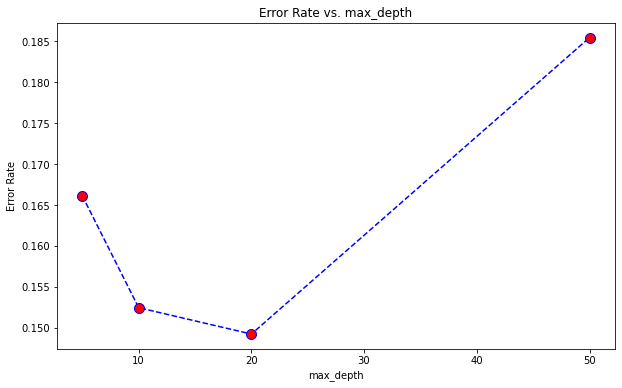

In [15]:
from sklearn.tree import DecisionTreeClassifier
error_rate = []
for i in (3,5,10,20):
 dt = DecisionTreeClassifier(max_depth=i,random_state=42)
 dt.fit(X_train,y_train)
 pred_i = dt.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot((5,10,20,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')
plt.show()

In [16]:
df = DecisionTreeClassifier(max_depth=20,random_state=42)
df.fit(X_train,y_train)
y_pred = df.predict(X_test)
accuracy_score(y_test,y_pred),f1_score(y_test,y_pred)

(0.8145247965607247, 0.6165079365079364)

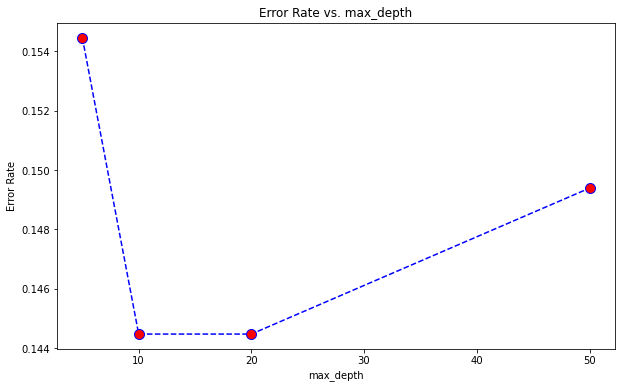

In [17]:
error_rate = []
for i in (5,10,20,50):
 rf = RandomForestClassifier(max_depth=i,random_state=42)
 rf.fit(X_train,y_train)
 pred_i = rf.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot((5,10,20,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')
plt.show()

In [18]:
rf = RandomForestClassifier(max_depth=20,random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred),f1_score(y_test,y_pred)

(0.8555197297712268, 0.6771869639794168)

# Based on accuracy_score Random Forest Classifier is best then Decison Tree 